## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('./QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2021-09-01 00:00:00,assembly,181
1,2021-09-01 00:00:00,c,1685
2,2021-09-01 00:00:00,c#,5473
3,2021-09-01 00:00:00,c++,3795
4,2021-09-01 00:00:00,delphi,125


In [4]:
df.tail()

,DATE,TAG,POSTS
2183,2008-08-01 00:00:00,perl,28
2184,2008-08-01 00:00:00,php,160
2185,2008-08-01 00:00:00,python,124
2186,2008-08-01 00:00:00,ruby,71
2187,2008-07-01 00:00:00,c#,3


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
shape = df.shape
print(f"There are {shape[0]} rows and {shape[1]} columns.")

There are 2188 rows and 3 columns.


**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2188
TAG      2188
POSTS    2188
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which programming language has had the highest total number of posts of all time?

In [7]:
summed_df = df.groupby('TAG').sum()
summed_df

,POSTS
TAG,
assembly,38543
c,365020
c#,1498374
c++,738196
delphi,48569
go,56279
java,1799286
javascript,2271914
perl,65949


In [8]:
highest_posts = summed_df.loc[summed_df['POSTS'].idxmax()].name.capitalize()
print(f"The language with the highest number of posts is {highest_posts}.")

The language with the highest number of posts is Javascript.


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [9]:
datapoints = df.groupby('TAG').count()
datapoints

,DATE,POSTS
TAG,,
assembly,158,158
c,158,158
c#,159,159
c++,158,158
delphi,158,158
go,143,143
java,158,158
javascript,158,158
perl,158,158


In [10]:
fewest_entries = datapoints.loc[datapoints['DATE'].idxmin()].name.capitalize()
print(f"The language with the fewest entries is {fewest_entries}.")

The language with the fewest entries is Go.


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])

## Data Manipulation



Pivot the dataframe to get a table with the total number of posts per month per language. Now, each row is a date and each column is a programming language.

In [12]:
reshaped_df = df.pivot_table(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,507.0,164.0,14.0,NaN,222.0,163.0,28.0,160.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,326.0,2253.0,6534.0,4583.0,179.0,700.0,9593.0,18271.0,122.0,5027.0,25907.0,5355.0,445.0,2198.0
2021-06-01,279.0,2006.0,6405.0,4173.0,133.0,646.0,9158.0,17508.0,157.0,4847.0,24369.0,4911.0,469.0,2114.0
2021-07-01,191.0,1724.0,5931.0,3804.0,148.0,651.0,8297.0,17248.0,140.0,4586.0,23949.0,4630.0,497.0,2272.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
shape = reshaped_df.shape
print(f"There are {shape[0]} rows and {shape[1]} columns in the reshaped_df.")

There are 159 rows and 14 columns in the reshaped_df.


In [14]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,507.0,164.0,14.0,NaN,222.0,163.0,28.0,160.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


In [15]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-05-01,326.0,2253.0,6534.0,4583.0,179.0,700.0,9593.0,18271.0,122.0,5027.0,25907.0,5355.0,445.0,2198.0
2021-06-01,279.0,2006.0,6405.0,4173.0,133.0,646.0,9158.0,17508.0,157.0,4847.0,24369.0,4911.0,469.0,2114.0
2021-07-01,191.0,1724.0,5931.0,3804.0,148.0,651.0,8297.0,17248.0,140.0,4586.0,23949.0,4630.0,497.0,2272.0
2021-08-01,170.0,1662.0,5908.0,3555.0,141.0,805.0,8072.0,17123.0,122.0,4704.0,23247.0,4546.0,506.0,2219.0
2021-09-01,181.0,1685.0,5473.0,3795.0,125.0,665.0,7336.0,15158.0,117.0,4324.0,20052.0,3742.0,457.0,1759.0


In [16]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [17]:
reshaped_df.count()

TAG
assembly      158
c             158
c#            159
c++           158
delphi        158
go            143
java          158
javascript    158
perl          158
php           158
python        158
r             156
ruby          158
swift         150
dtype: int64

Replace NaN values with 0.

In [18]:
reshaped_df.fillna(0, inplace=True)

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

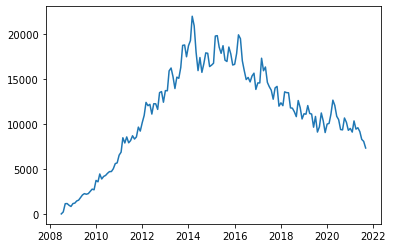

In [72]:
plt.plot(reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

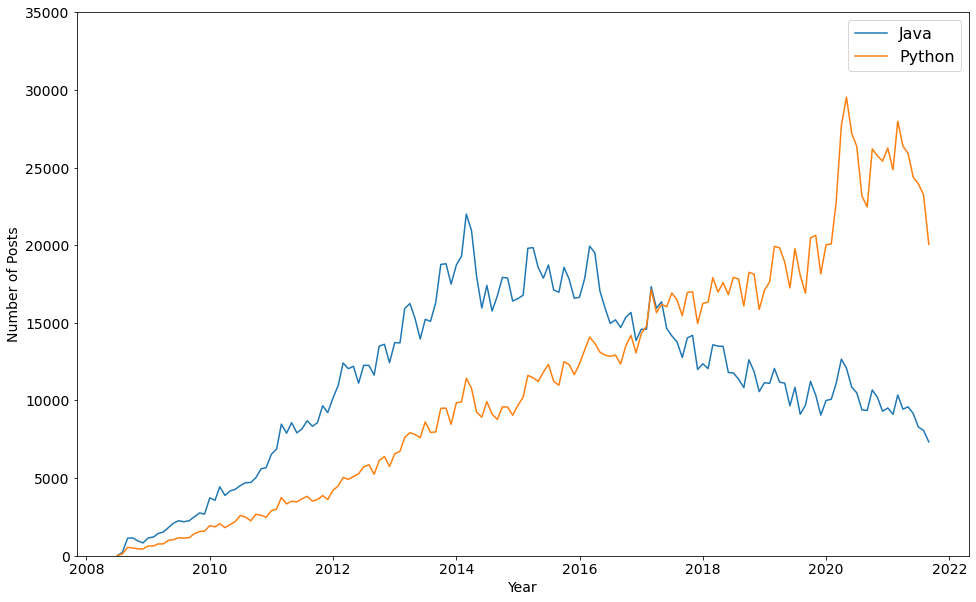

In [ ]:
# Make the chart bigger
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df[['java', 'python']])
plt.legend(['Java', 'Python'], fontsize=16)

Plot all the languages in one chart.

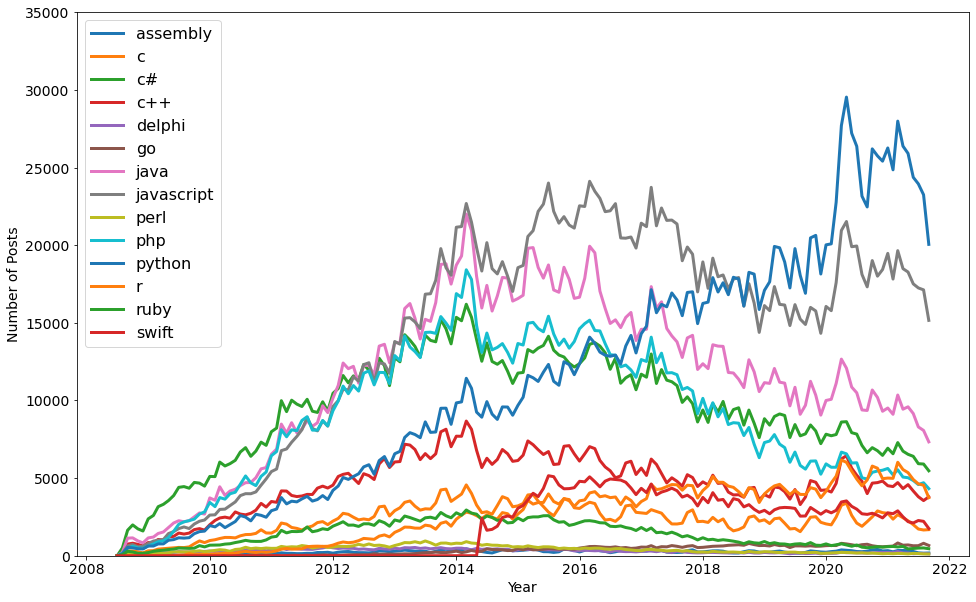

In [59]:
# Make the chart bigger
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Plot the chart
plt.plot(reshaped_df, linewidth=3)
plt.legend(reshaped_df, fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one observation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

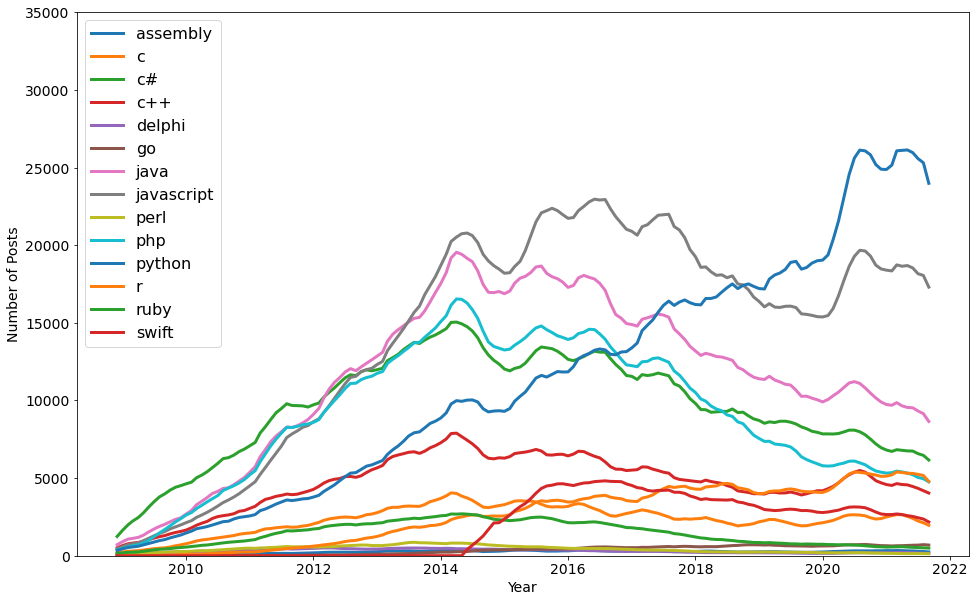

In [89]:
# The window size is the number of observations that are averaged together to create a single point.
rolling_df = reshaped_df.rolling(window=6).mean()

# Make things bigger
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Plot the chart
plt.plot(rolling_df, linewidth=3)
plt.legend(rolling_df, fontsize=16)